# Aula 08: Reações Químicas



No módulo de hoje aprenderemos como retratar reações químicas no RDKit


In [ ]:
%%capture
!pip install rdkit

In [ ]:
# Importação dos Módulos
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

Algumas anotações de SMARTS

* Átomos específicos: O SMARTS [#6] representa qualquer átomo de carbono (C).

* Grupos funcionais: O SMARTS [OH] representa qualquer grupo hidroxila (OH).

* Ligações: O SMARTS C=O representa uma ligação dupla entre carbono (C) e oxigênio (O).

* Repetições: O SMARTS C1CCCCC1 representa um anel hexagonal de átomos de carbono.

* Rótulos: O SMARTS C1:C:C:C:C:C:1 representa um anel hexagonal onde o átomo de carbono 1 está ligado a todos os outros.

Elas serão utilizadas para representar as reações para que o sistema entenda quais átomos deverá manipular.

A reação que faremos de exemplo será de adição, como mostra a figura abaixo.

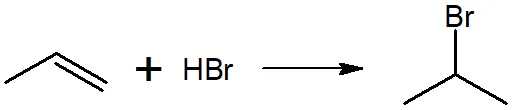

[19:55:47] WARNING: not removing hydrogen atom without neighbors


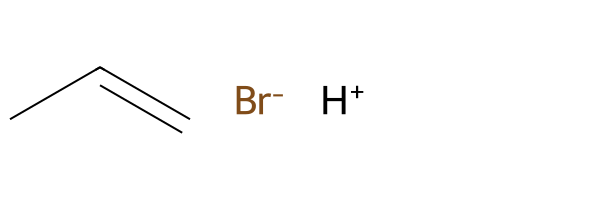

In [ ]:
#Escreva suas Moléculas em SMILES e visualize elas
subs1 = Chem.MolFromSmiles('CC=C')
subs2 = Chem.MolFromSmiles('[H+].[Br-]')

substancias = [subs1, subs2]
Draw.MolsToGridImage(substancias)

In [ ]:
#Utilizando SMARTS defina a reação
reacao1 = AllChem.ReactionFromSmarts('[#6:2]=[#6:3]>>[#6:2][Br:2]')

Onde:

[#6:2] : representa um carbono qualquer na segunda posição

Resultando em uma ligação do Br na segunda posição

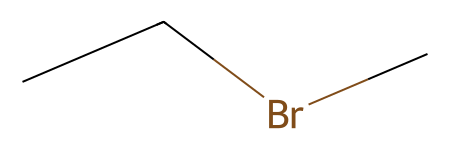

In [ ]:
#Rodamos nossa reação e vemos o resultado
reacao1.RunReactants((subs1, ))[0][0] #ele trata a reação como uma tupla

In [ ]:
#Sanitizer
resultado = reacao1.RunReactants((subs1, ))[0][0]
Chem.SanitizeMol(resultado)

[20:05:53] Explicit valence for atom # 1 Br, 2, is greater than permitted


AtomValenceException: ignored

In [ ]:
#Especificando mais a reação
reacao1 = AllChem.ReactionFromSmarts('[#6:2]=[#6:3]>>[#6:3][#6:2][Br:1]')

[20:06:21] product atom-mapping number 1 not found in reactants.


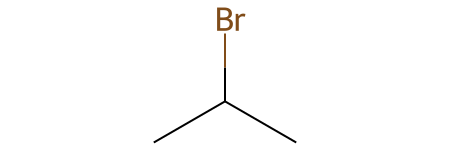

In [ ]:
#Rodamos nossa reação e vemos o resultado
reacao1.RunReactants((subs1, ))[0][0] #ele trata a reação como uma tupla

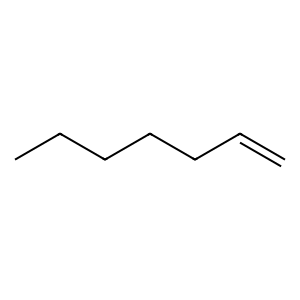

In [ ]:
#Reaproveitando a reação
subs3 = Chem.MolFromSmiles('CCCCCC=C')
Draw.MolToImage(subs3)

[20:14:59] product atom-mapping number 1 not found in reactants.


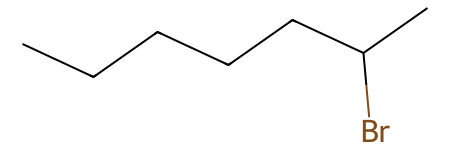

In [ ]:
reacao1 = AllChem.ReactionFromSmarts('[#6:2]=[#6:3]>>[#6:3][#6:2][Br:1]')
reacao1.RunReactants((subs3, ))[0][0]

Também podemos visualizar a reação de outra forma. Abaixo o ecxemplo de adição de um bromo a uma molécula de etano.

In [ ]:
# Defina uma reação SMARTS válida
reaction_smarts = "[#6:1]>>[#6:1][Br:2]"
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Execute a reação com um substrato
substrate = Chem.MolFromSmiles('CC')
products = reaction.RunReactants((substrate, ))

# Crie uma representação do desenho
img_size = (300, 150)
drawer = Draw.MolDraw2DCairo(*img_size)

# Desenhe a reação
drawer.DrawReaction(reaction)

# Acesse o texto do desenho
drawing_text = drawer.GetDrawingText()

# Salve a imagem da reação em um arquivo
img_file = 'reaction.png'
drawer.FinishDrawing()
img = drawer.GetDrawingText()
with open(img_file, 'wb') as f:
    f.write(img)

# Abra o arquivo da imagem
from PIL import Image
Image.open(img_file).show()


[20:16:42] product atom-mapping number 2 not found in reactants.


##Referências da Aula
###Banco de Dados para desenhar moléculas e obter seu SMILES
https://zinc.docking.org/substances/home/


##Para saber mais sobre SMARTS
https://www.herongyang.com/Cheminformatics/Babel-Substructure-Search-with-SMARTS-Expressions.html

https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html

##Quer conhecer mais aplicações? Veja o projeto desse usuário no github
https://github.com/rdkit/rdkit-tutorials/tree/master